<a href="https://colab.research.google.com/github/Roohiashahzad/Roohia_INFO5731_Spring2020/blob/main/Final_PseudoLabelAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading From Files

In [ ]:
import pandas as pd
testfilename = "/content/AllDataSet.csv" #Test data file
trainfilename = "/content/Final_TrainData_ACL&ALL.csv" #Training/labeled data file 
d1 = pd.read_csv(testfilename, encoding= 'unicode_escape')
d2 = pd.read_csv(trainfilename, encoding= 'unicode_escape')


In [ ]:
d1.head()

,Title,Contributions,Source,Labels
0,The measurement of âinterdisciplinarityâ a...,"In this study, we discuss recent advances in t...",JASIST,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,NaN


In [ ]:
d2.head()

,Title,Contributions,Source,Labels
0,Text Mining for Personalized Knowledge Extract...,Extend and evaluate existing textâmining tec...,JASIST,Algorithm or Method or Technology Optimization
1,Text Mining for Personalized Knowledge Extract...,Design and develop a layer for extraction of k...,JASIST,New Algorithm or Method or Technology
2,Text Mining for Personalized Knowledge Extract...,"Evaluate relevance, reliability, and demonstra...",JASIST,Performance Evaluation
3,PSI: A probabilistic semantic interpretable fr...,A novel semantic interpretable framework is pr...,JASIST,Model Construction
4,PSI: A probabilistic semantic interpretable fr...,with the attribute based representation and su...,JASIST,Algorithm or Method or Technology Optimization


#Data Cleaning

In [ ]:
d1['lower_Case'] = d1['Contributions'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
d2['lower_Case'] = d2['Contributions'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
d1['remove_Punc'] = d1['lower_Case'].str.replace('[^\w\s]','')
d2['remove_Punc'] = d2['lower_Case'].str.replace('[^\w\s]','')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
d1['stop_words'] = d1['remove_Punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
d2['stop_words'] = d2['remove_Punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
frequent_words = list(pd.Series(' '.join(str(d1['Contributions'])).split()).value_counts()[:15].index)
d1["freq_words"] = d1['stop_words'].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words]))


In [ ]:
frequent_words = list(pd.Series(' '.join(d2['Contributions']).split()).value_counts()[:15].index)
d2["freq_words"] = d2['stop_words'].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words]))


In [ ]:
from textblob import TextBlob
d1['word_tokenize'] = d1['freq_words'].apply(lambda x: TextBlob(x).words)

In [ ]:
from textblob import TextBlob
d2['word_tokenize'] = d2['freq_words'].apply(lambda x: TextBlob(x).words)

In [ ]:
import nltk
nltk.download('wordnet')
from textblob import Word
d1['lemmatized'] = d1['word_tokenize'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from textblob import Word
d2['lemmatized'] = d2['word_tokenize'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

In [ ]:
test = d1[['Title', 'Contributions', 'Source', 'Labels']] #clean test data
train = d2[['Title', 'Contributions', 'Source', 'Labels']] #clean train data

In [ ]:
test.to_csv('/content/test.csv', index = False)
train.to_csv('/content/train.csv', index = False)

In [ ]:
test

,Title,Contributions,Source,Labels
0,The measurement of âinterdisciplinarityâ a...,"In this study, we discuss recent advances in t...",JASIST,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,NaN
...,...,...,...,...
4854,Vulnerable community identification using hate...,We collected and annotated Amharic data for th...,IPM,NaN
4855,Vulnerable community identification using hate...,We utilize Apache Spark distributed platform f...,IPM,NaN
4856,Information behavior and ICT use of Latina imm...,Latina immigrants to the U.S. Midwest have at ...,IPM,NaN
4857,Information behavior and ICT use of Latina imm...,ICTs support information seeking and use along...,IPM,NaN


In [ ]:
train

,Title,Contributions,Source,Labels
0,Text Mining for Personalized Knowledge Extract...,Extend and evaluate existing textâmining tec...,JASIST,Algorithm or Method or Technology Optimization
1,Text Mining for Personalized Knowledge Extract...,Design and develop a layer for extraction of k...,JASIST,New Algorithm or Method or Technology
2,Text Mining for Personalized Knowledge Extract...,"Evaluate relevance, reliability, and demonstra...",JASIST,Performance Evaluation
3,PSI: A probabilistic semantic interpretable fr...,A novel semantic interpretable framework is pr...,JASIST,Model Construction
4,PSI: A probabilistic semantic interpretable fr...,with the attribute based representation and su...,JASIST,Algorithm or Method or Technology Optimization
...,...,...,...,...
3128,NaN,we propose a simple and parameter-efficient ad...,ACL,Theory Proposal
3129,NaN,we propose an approach that uses both the sent...,ACL,Model Construction
3130,NaN,We propose an endto-end approach for jointly p...,ACL,Dataset Creation
3131,NaN,we aim to compare the performance of attention...,ACL,Performance Evaluation


# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
### label encoding cate. var.
col = ['Title','Contributions','Source','Labels']
test['Labels'] = 0
combi = train.append(test)
number = LabelEncoder()
for i in col:
  combi[i] = number.fit_transform(combi[i].astype('str'))
  combi[i] = combi[i].astype('int')
train = combi[:train.shape[0]]
test = combi[train.shape[0]:]
test.drop('Labels',axis=1,inplace=True)
 
training = train.drop(['Contributions'],axis=1)
testing = test.drop(['Contributions'],axis=1)

y_train = training['Labels']
training.drop('Labels',axis=1,inplace=True)
#y_test = testing['Labels']
features = training.columns
target = 'Labels'

X_train, X_test = training, testing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


#Comparing rmse scores for 4 classifers


In [ ]:
model_factory = [
 RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
 LinearSVC(),
 MultinomialNB(),
 LogisticRegression(random_state=0),
]


num_folds = 3
for model in model_factory:
  model.seed = 42
  model.fit(X_train,y_train)
  scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
  score_description = " %0.2f (+/- %0.2f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)
  print('{model:25} CV-5 RMSE: {score}'.format( model=model.__class__.__name__, score=score_description))
  

RandomForestClassifier    CV-5 RMSE:  2.57 (+/- 4.25)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC                 CV-5 RMSE:  3.51 (+/- 6.79)
MultinomialNB             CV-5 RMSE:  2.89 (+/- 4.87)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression        CV-5 RMSE:  2.82 (+/- 3.71)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#Creating Pseudolabel model

In [ ]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin


#Sci-kit learn wrapper for creating pseudo-lebeled estimators.
#
class PseudoLabeler(BaseEstimator, RegressorMixin):

  #sample_rate - percent of samples used as pseudo-labelled data from the unlabelled dataset
  def __init__(self, model, unlabled_data, features, target, sample_rate=0.2, seed=42):    
    assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'
    self.sample_rate = sample_rate
    self.seed = seed
    self.model = model
    self.model.seed = seed
    self.unlabled_data = unlabled_data
    self.features = features
    self.target = target

  def get_params(self, deep=True):
    return {
        "sample_rate": self.sample_rate,
        "seed": self.seed,
        "model": self.model,
        "unlabled_data": self.unlabled_data,
        "features": self.features,
        "target": self.target}

  def set_params(self, **parameters):
    for parameter, value in parameters.items():
      setattr(self, parameter, value)
      return self

#Fit the data using pseudo labeling.
  def fit(self, X, y): 
    augemented_train = self.__create_augmented_train(X, y)
    self.model.fit(
        augemented_train[self.features], augemented_train[self.target])
    return self
#Create and return the augmented_train set that consists of pseudo-labeled and labeled data.
  def __create_augmented_train(self, X, y):   
    num_of_samples = int(len(self.unlabled_data) * self.sample_rate)

# Train the model and create the pseudo-labels
    self.model.fit(X, y)
    pseudo_labels = self.model.predict(self.unlabled_data[self.features])

# Add the pseudo-labels to the test set
    pseudo_data = self.unlabled_data.copy(deep=True)
    pseudo_data[self.target] = pseudo_labels
    
# Take a subset of the test set with pseudo-labels and append in onto
 # the training set
    sampled_pseudo_data = pseudo_data.sample(n=num_of_samples)
    temp_train = pd.concat([X, y], axis=1)
    augemented_train = pd.concat([sampled_pseudo_data, temp_train])
    return shuffle(augemented_train)

#Returns the predicted values.
  def predict(self, X):
    return self.model.predict(X)

  def get_model_name(self):
    return self.model.__class__.__name__




#Comparing Random Forest classifier with Pseudo label model

In [ ]:
model_factory = [
RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
 PseudoLabeler(
 RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
 test,
 features,
 target,
 sample_rate=0.3
 ),
]

for model in model_factory:
  model.seed = 42
  num_folds = 8
  scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
  score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)
  print('{model:25} CV-{num_folds} {score_cv}'.format(
 model=model.__class__.__name__,
 num_folds=num_folds,
 score_cv=score_description
 ))

RandomForestClassifier    CV-8 MSE: 2.9338 (+/- 6.5932)
PseudoLabeler             CV-8 MSE: 2.8412 (+/- 5.8090)


#Comparing Linear SVC classifier with Pseudo label model

In [ ]:
model_factory = [
LinearSVC(),
 PseudoLabeler(
 LinearSVC(),
 test,
 features,
 target,
 sample_rate=0.3
 ),
]

for model in model_factory:
  model.seed = 42
  num_folds = 8
  scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
  score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)
  print('{model:25} CV-{num_folds} {score_cv}'.format(
 model=model.__class__.__name__,
 num_folds=num_folds,
 score_cv=score_description
 ))

LinearSVC                 CV-8 MSE: 3.0458 (+/- 5.0020)
PseudoLabeler             CV-8 MSE: 3.2041 (+/- 5.3727)


#Comparing Mutlinomial NB classifier with Pseudo label model

In [ ]:
model_factory = [
MultinomialNB(),
 PseudoLabeler(
 MultinomialNB(),
 test,
 features,
 target,
 sample_rate=0.3
 ),
]

for model in model_factory:
  model.seed = 42
  num_folds = 8
  scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
  score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)
  print('{model:25} CV-{num_folds} {score_cv}'.format(
 model=model.__class__.__name__,
 num_folds=num_folds,
 score_cv=score_description
 ))

MultinomialNB             CV-8 MSE: 2.9483 (+/- 6.7870)
PseudoLabeler             CV-8 MSE: 2.9649 (+/- 6.0384)


#Comparing Logistic Regression classifier with Pseudo label model

In [ ]:
model_factory = [
LogisticRegression(),
 PseudoLabeler(
 LogisticRegression(),
 test,
 features,
 target,
 sample_rate=0.3
 ),
]

for model in model_factory:
  model.seed = 42
  num_folds = 8
  scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
  score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)
  print('{model:25} CV-{num_folds} {score_cv}'.format(
 model=model.__class__.__name__,
 num_folds=num_folds,
 score_cv=score_description
 ))

LogisticRegression        CV-8 MSE: 2.9659 (+/- 6.9536)
PseudoLabeler             CV-8 MSE: 2.9294 (+/- 5.9966)


#Result
From above analysis, we see that Random Forest classifier has the lowest pseudo label model rmse score. But logistic regression has highest CV score and second lowest pseudo label rmse score. 

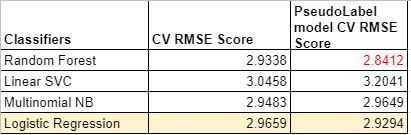

**Hence, we will use Logistic Regression model in our main file.**